In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

## Load the dataset

In [12]:
!mkdir dataset
!gdown https://drive.google.com/uc?id=1JkdFa4fj0DMrDHju7QqC4EiUfJD9Cjws

mkdir: cannot create directory ‘dataset’: File exists
Downloading...
From: https://drive.google.com/uc?id=1JkdFa4fj0DMrDHju7QqC4EiUfJD9Cjws
To: /content/mrl_dataset.npz
696MB [00:05, 130MB/s]


In [13]:
dataset_path = Path('mrl_dataset.npz').absolute().resolve()
data = np.load(str(dataset_path))
X = data['data']
y = np.squeeze(data['labels'])
data.close()

## Split the dataset into training and testing datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
print(f"Number of samples in training dataset: {X_train.shape[0]}")
print(f"Number of samples in testing dataset : {X_test.shape[0]}")

Number of samples in training dataset: 56881
Number of samples in testing dataset : 28017


## Create a Random Forest Classifier

In [16]:
VERBOSITY = 1

In [17]:
classifier = RandomForestClassifier(max_depth=3, random_state=42, verbose=VERBOSITY, n_jobs=5)

In [18]:
classifier.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   34.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

## Check the accuracy of the classifier

In [19]:
classifier.score(X_test, y_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9005960666738052

## Cross Validation 

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   41.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   41.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   16.5s
[Parallel(n_job

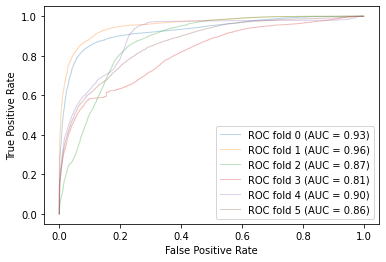

In [20]:
cv = StratifiedKFold(n_splits=6)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
plt.show()

## Hyperparameter tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num=5)]
# Number of features to consider at every split
# max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num=10, endpoint=True)]
# Minimum number of samples required to split a node
# min_samples_split = [5, 10]

# Create the random grid
random_grid = {
    # "n_estimators": n_estimators,
    # "max_features": max_features,
    "max_depth": max_depth,
    # "min_samples_split": min_samples_split,
}

pprint(random_grid)

{'max_depth': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100]}


In [27]:
rf_random = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=random_grid,
    n_iter=10,
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 69.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 240.4min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  3.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=3,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [28]:
rf_random.best_params_

{'max_depth': 34}

In [30]:
rf_random.best_score_

0.9783759291687094